# Implement from scratch

In [2]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()


# Test model

(500, 2)
3


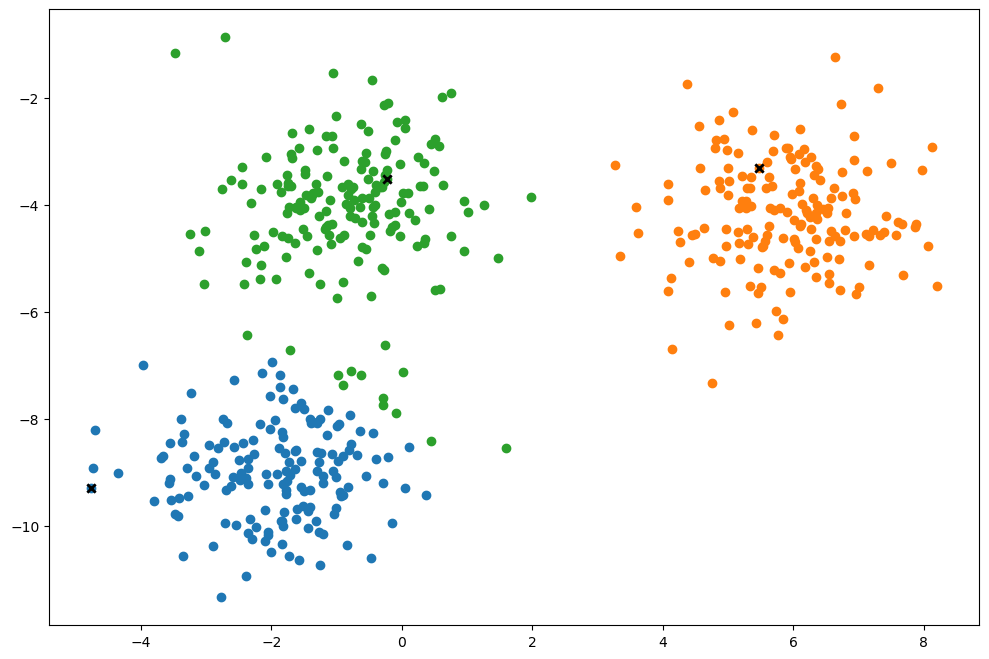

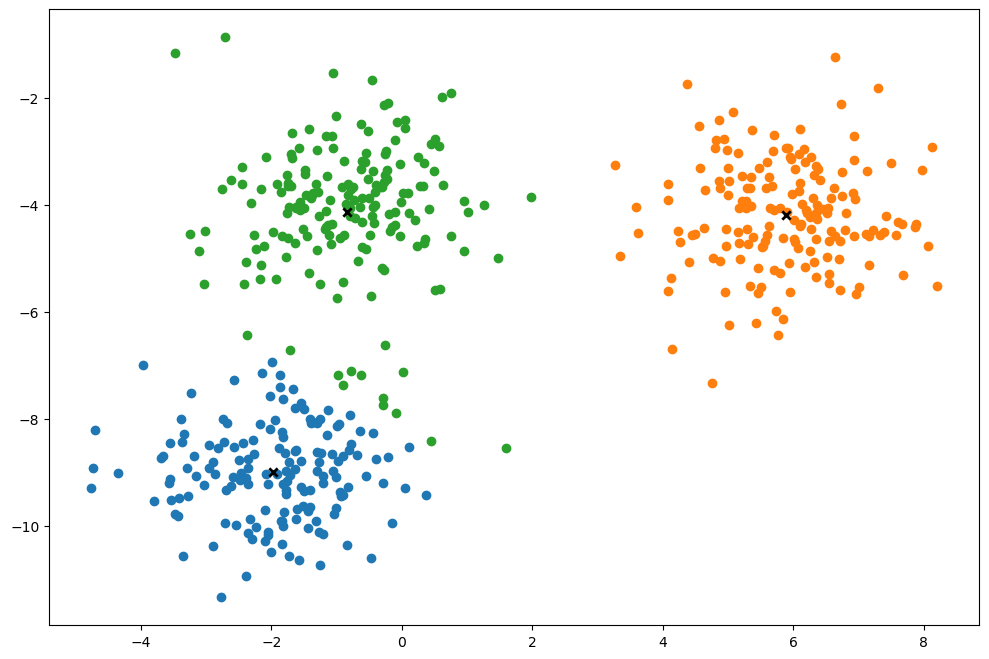

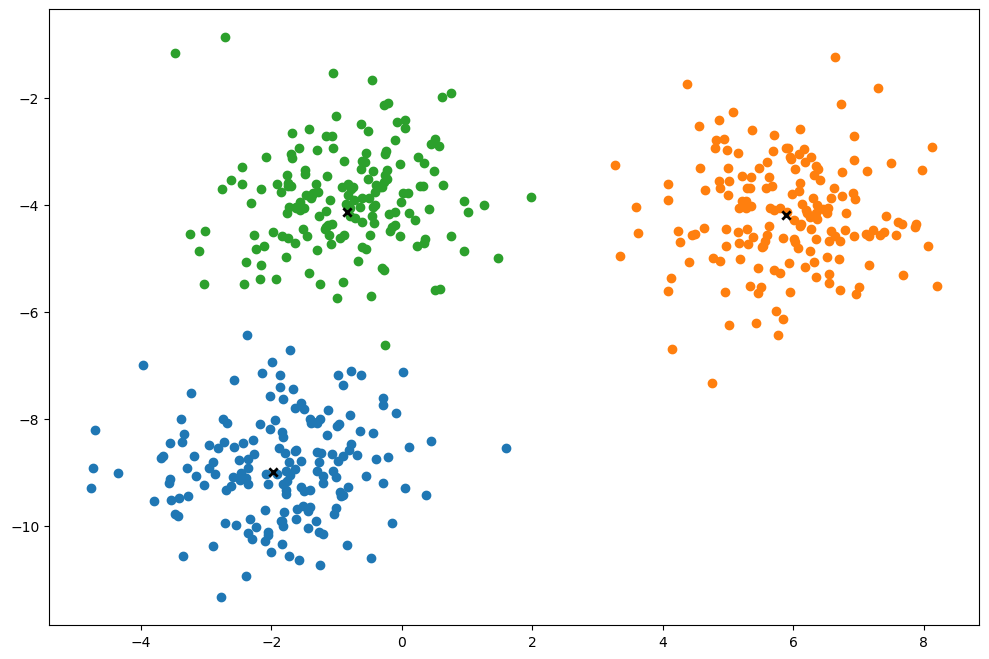

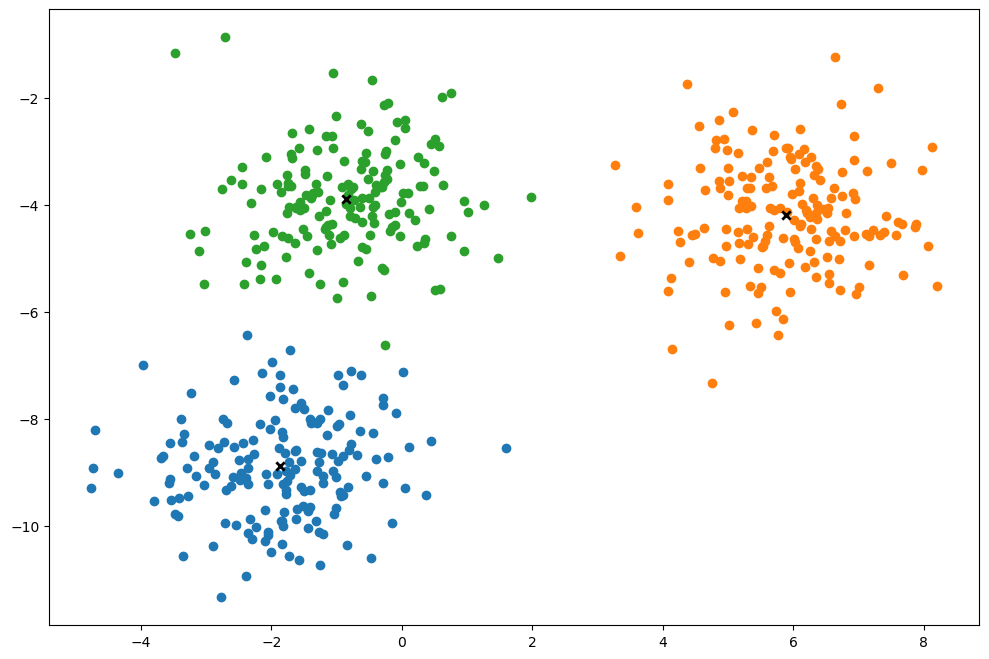

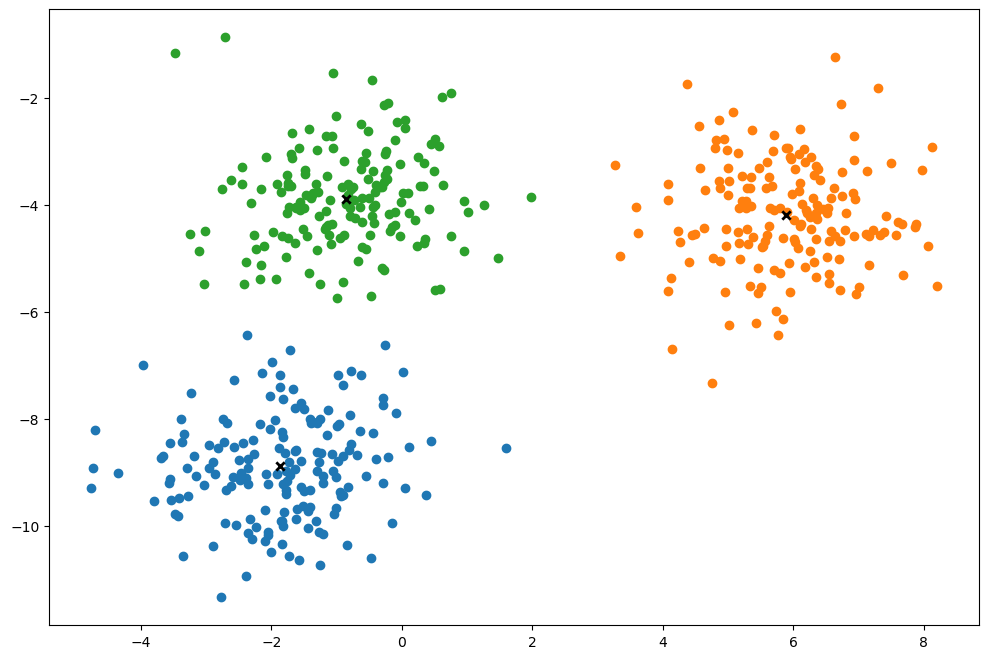

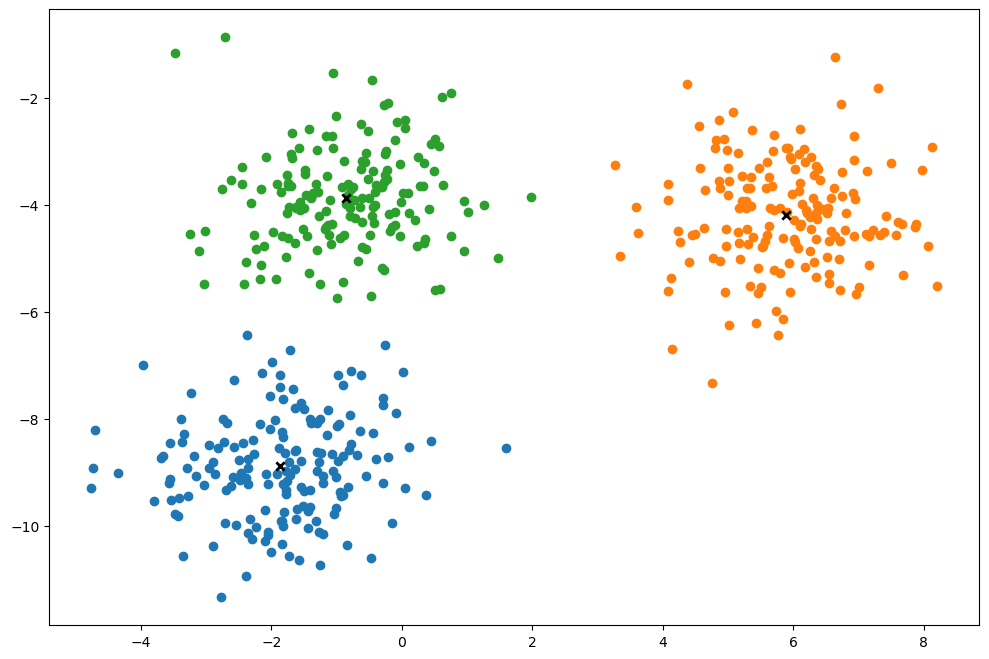

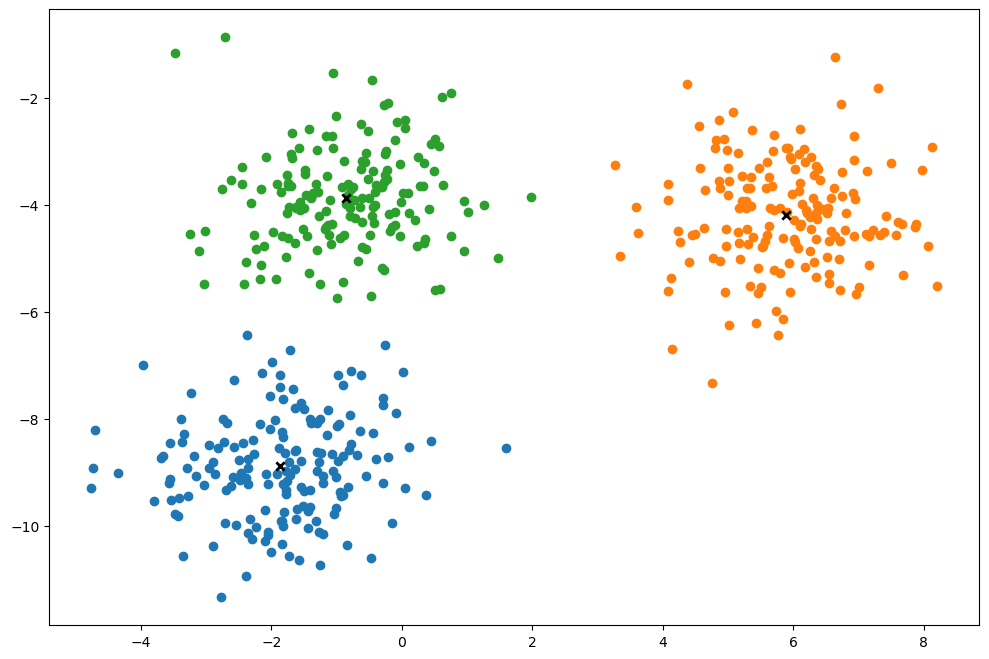

<Figure size 10x10 with 0 Axes>

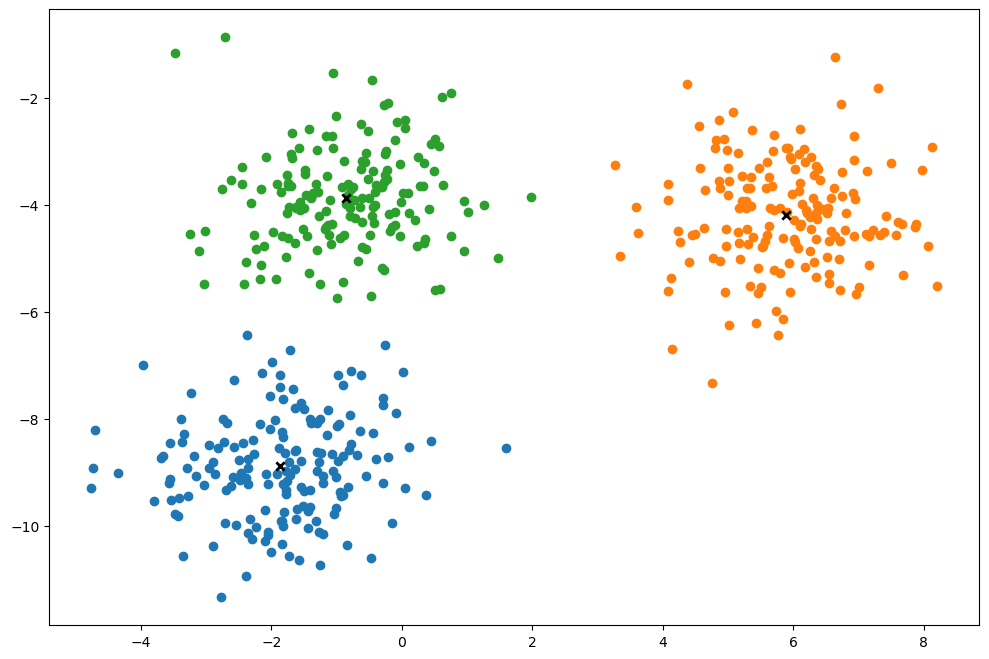

In [42]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
        centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
    )
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

k = KMeans(K=clusters, max_iters=150, plot_steps=True)
y_pred = k.predict(X)
plt.figure(figsize = (0.1,0.1))
k.plot()

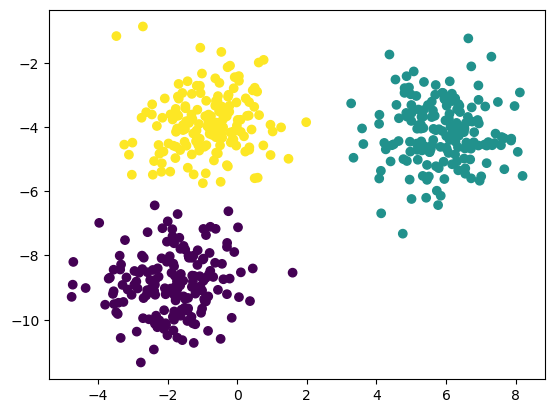

In [68]:
plt.scatter(x=X[:,0], y=X[:,1], c=y_pred)

In [72]:
k.centroids

array([[-1.86315371, -8.87400825],
       [ 5.88032652, -4.18480765],
       [-0.86175784, -3.87190776]])

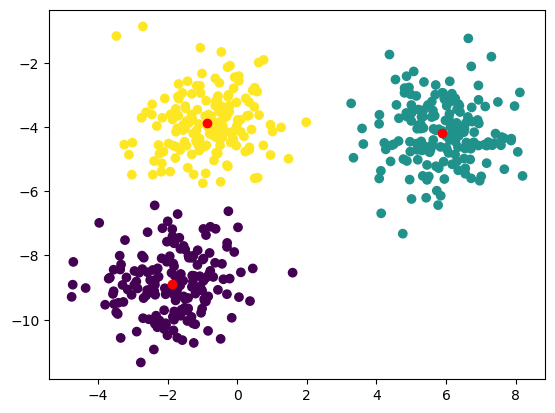

In [70]:
plt.scatter(x=X[:,0], y=X[:,1], c=y_pred)
plt.scatter(x=k.centroids[:,0],y=k.centroids[:,1], color = 'red')

# Using scikit-learn library

D:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


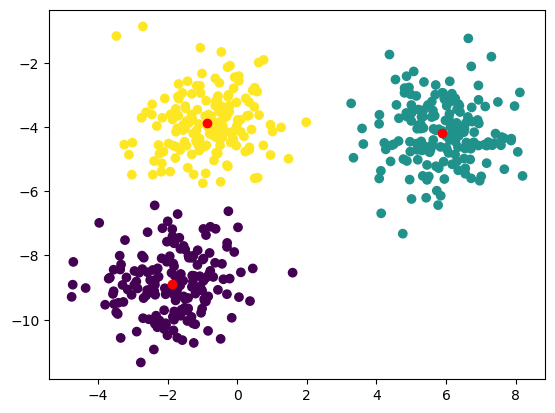

In [105]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X)
y_predict = model.predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y_predict)
plt.scatter(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color = 'red')

Ta thấy dùng thư viện cho kết quả khá giống với cách bên trên

In [107]:
model.cluster_centers_

array([[-1.8727302 , -8.88741032],
       [ 5.88032652, -4.18480765],
       [-0.8580763 , -3.88857778]])